In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("/Users/Safa BENABDESSADOK/Desktop/M1 GL/SAD/SAD project/Dataset/CIC-IDS2017/MachineLearningCVE.csv")

In [3]:
data.columns = [x.strip() for x in data.columns]

In [4]:
data.isnull().sum().sort_values(ascending = False)

Flow Bytes/s                   1358
Destination Port                  0
Bwd Avg Bytes/Bulk                0
Fwd Avg Packets/Bulk              0
Fwd Avg Bytes/Bulk                0
Fwd Header Length.1               0
Avg Bwd Segment Size              0
Avg Fwd Segment Size              0
Average Packet Size               0
Down/Up Ratio                     0
ECE Flag Count                    0
CWE Flag Count                    0
URG Flag Count                    0
ACK Flag Count                    0
PSH Flag Count                    0
RST Flag Count                    0
SYN Flag Count                    0
FIN Flag Count                    0
Packet Length Variance            0
Fwd Avg Bulk Rate                 0
Bwd Avg Packets/Bulk              0
Packet Length Mean                0
Active Mean                       0
Idle Min                          0
Idle Max                          0
Idle Std                          0
Idle Mean                         0
Active Min                  

Only the **Flow Bytes/s** feature values have **1358** missing values

In [5]:
data.duplicated().sum()

308381

We have **308381** duplicated instances values

In [6]:
data.describe().T.round(5)

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.00000,80.00000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.00000,31316.00000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.00000,2.00000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.00000,2.00000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.00000,62.00000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.00000,123.00000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.00000,37.00000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.00000,2.00000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.00000,34.00000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.00000,0.00000,2.616295e+01,7.125597e+03


**Remarks:** 
We remark that 8 columns have the value **0** for all instances, those columns are :  
- **Bwd PSH Flags**
- **Bwd URG Flags**
- **Fwd Avg Bytes/bulk**
- **Fwd Avg Packets/Bulk** 
- **Fwd Avg Bulk Rate**
- **Bwd Avg Bytes/Bulk**
- **Bwd Avg Packets/Bulk**
- and **Bwd Avg Bulk Rate**

We remark **Flow Bytes/s** and **Flow Packets/s** columns have instances with the **infinity** value.

In [7]:
benign = data[data['Label'] == "BENIGN"]
malicious = data[data['Label'] != "BENIGN"]

In [8]:
def port_category(x):
    if  0 <= x and x <= 1023:
        return "system or well-known"
        # Ports with numbers 0–1023 are called system or well-known ports;
    elif  1024 <= x and x <= 49151:
        return "user or registered"
        # ports with numbers 1024-49151 are called user or registered ports,
    elif  49152 <= x and x <= 65535:
        return "dynamic, private or ephemeral" 
        # and ports with numbers 49152-65535 are called dynamic, private or ephemeral ports
    else:
        return "outlier"

In [9]:
benign["Destination Port category"] = benign["Destination Port"].apply(port_category)
benign_dpc = benign["Destination Port category"].value_counts()
benign_dpc

system or well-known             1780620
dynamic, private or ephemeral     300040
user or registered                192437
Name: Destination Port category, dtype: int64

In [10]:
malicious["Destination Port category"] = malicious["Destination Port"].apply(port_category)
malicious_dpc = malicious["Destination Port category"].value_counts()
malicious_dpc

system or well-known             421626
user or registered               126820
dynamic, private or ephemeral      9200
Name: Destination Port category, dtype: int64

**There is no Destination Port value *outlier***

Text(0, 0.5, 'Frequency')

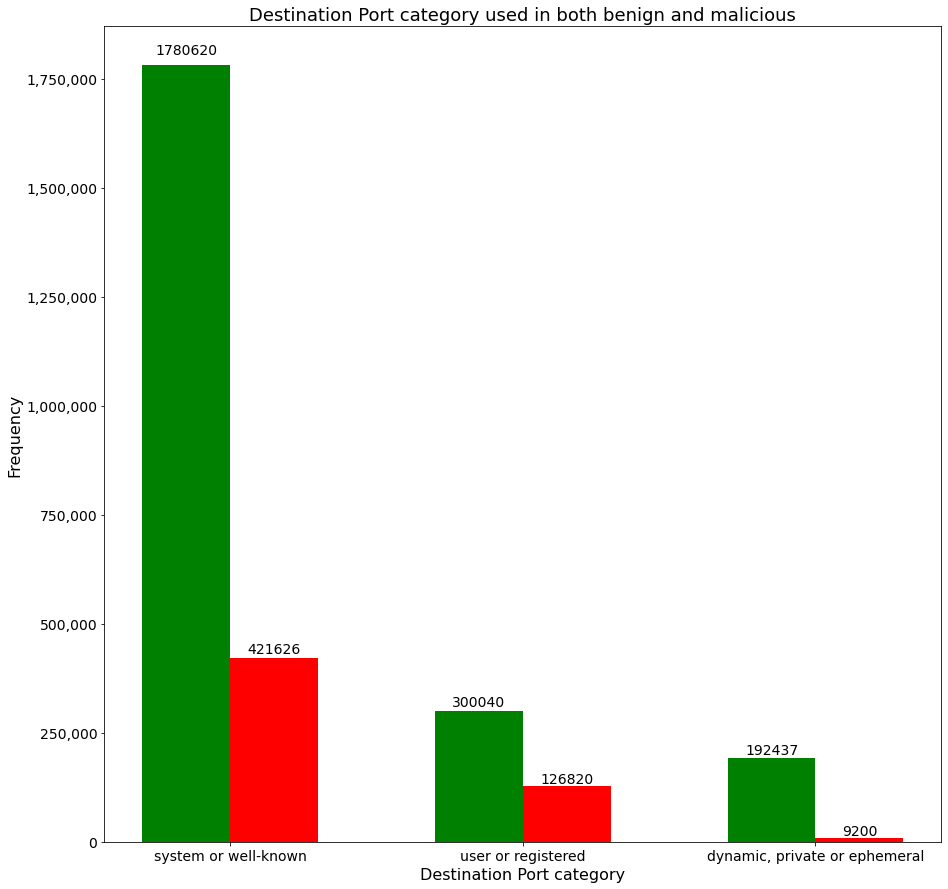

In [26]:
# nb category = indexes
index = np.arange(3)
width = 0.3
ax = plt.figure(figsize=(15,15)).add_subplot()
benign_rects = ax.bar(index, benign_dpc.values, width, color = "g")
malicious_rects = ax.bar(index + width, malicious_dpc.values, width,color = "r")

def labeling_rects(rect):
    for r in rect:
        h = r.get_height()
        _ = ax.text(r.get_x() + r.get_width()/2, h*1.01, s = format(h), fontsize = 14, ha = 'center', va = 'bottom')

labeling_rects(benign_rects)
labeling_rects(malicious_rects)

_ = ax.set_xticks(index + width / 2)
_ = ax.set_xticklabels(["system or well-known", "user or registered", "dynamic, private or ephemeral"], fontsize = 14)
_ = ax.set_yticklabels(["{:,}".format(int(x)) for x in ax.get_yticks()], fontsize = 14)
plt.title('Destination Port category used in both benign and malicious', fontsize = 18)
plt.xlabel('Destination Port category', ha = 'center', fontsize = 16 )
plt.ylabel('Frequency', ha = 'center', fontsize = 16)

**System or well-known ports are the most used port for Normal human activities and attackers' activities**

In [12]:
data.corr()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.151680,-0.004236,-0.003947,0.011145,-0.003082,0.097926,-0.045388,0.140220,0.128861,-0.191589,-0.246690,-0.215817,-0.171472,0.065181,0.232879,-0.100522,-0.115974,-1.145840e-01,-0.021869,-0.151227,-0.095334,-0.096564,-0.113616,-0.050704,-0.104947,-0.067298,-0.032592,-0.050844,-0.050059,0.224795,NaN,0.001362,NaN,4.062139e-04,0.000693,0.218184,0.134973,-0.243119,-0.123598,-0.149267,-0.119744,-0.065570,-0.039863,0.224795,-0.006468,-0.179430,0.528309,0.504628,0.001362,-0.006379,0.037481,-0.150502,0.140220,-0.215817,4.062139e-04,NaN,NaN,NaN,NaN,NaN,NaN,-0.004236,0.011160,-0.003947,-0.003082,-0.112727,0.210028,-0.003226,0.000897,-0.035562,-0.043717,-0.051859,-0.023194,-0.112585,0.010399,-0.108185,-0.114614
Flow Duration,-0.151680,1.000000,0.020857,0.019670,0.065456,0.016186,0.273308,-0.105230,0.143689,0.234437,0.497640,-0.215999,0.461906,0.445578,-0.025261,-0.122429,0.536317,0.739567,7.842698e-01,0.065037,0.998560,0.548486,0.725482,0.783889,0.214201,0.822540,0.413574,0.522389,0.585330,0.216291,-0.010856,NaN,-0.004635,NaN,-1.621749e-04,-0.001120,-0.113352,-0.080547,-0.227031,0.513421,0.432010,0.458413,0.282973,0.186281,-0.010856,0.008809,0.166839,0.027928,-0.101802,-0.004635,0.008760,-0.147537,0.410007,0.143689,0.461906,-1.621749e-04,NaN,NaN,NaN,NaN,NaN,NaN,0.020857,0.065542,0.019670,0.016186,0.098751,-0.021368,0.015942,-0.001357,0.189299,0.241060,0.294034,0.121171,0.768034,0.243154,0.779527,0.738328
Total Fwd Packets,-0.004236,0.020857,1.000000,0.999070,0.365508,0.996993,0.009358,-0.002989,0.000032,0.001403,0.022820,-0.005592,0.021403,0.006473,0.000386,-0.002622,-0.001013,-0.000504,2.299036e-03,-0.000540,0.020528,-0.001028,0.000083,0.001851,-0.001152,0.024041,-0.000633,0.000763,0.003414,-0.001001,0.001927,NaN,-0.000104,NaN,4.748410e-04,0.013748,-0.002430,-0.001712,-0.006270,0.022013,0.024453,0.012058,0.005473,-0.001373,0.001927,0.000358,0.006591,0.001223,-0.003480,-0.000104,0.000356,0.001050,0.022101,0.000032,0.021403,4.748410e-04,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.365990,0.999070,0.996987,0.003748,-0.000371,0.887387,-0.000184,0.039937,0.008329,0.030459,0.041283,0.001820,0.000809,0.001906,0.001670
Total Backward Packets,-0.003947,0.019670,0.999070,1.000000,0.359451,0.994429,0.009039,-0.002600,-0.000333,0.001026,0.022594,-0.004858,0.021505,0.006135,0.000291,-0.002762,-0.001366,-0.000988,1.829633e-03,-0.000570,0.019323,-0.001220,-0.000456,0.001368,-0.001029,0.023454,-0.000798,0.000550,0.003483,-0.000962,0.001711,NaN,-0.000109,NaN,7.557931e-04,0.013764,-0.002622,-0.001397,-0.005696,0.021730,0.024839,0.011895,0.005430,-0.001262,0.001711,0.000232,0.006107,0.001004,-0.002845,-0.000109,0.000231,0.003464,0.022496,-0.000333,0.021505,7.

**Bwd PSH Flags**, **Bwd URG Flags**, **Fwd Avg Bytes/bulk**, **Fwd Avg Packets/Bulk**, **Fwd Avg Bulk Rate**, **Bwd Avg Bytes/Bulk**, **Bwd Avg Packets/Bulk** and **Bwd Avg Bulk Rate**, its correlation with other features is not determinited 

### So, we will remove the duplicates and the rows which have missing values
### Also, columns that have a *0 value* for all examples have no effect on the result this means that they will be dropped

In [13]:
data.dropna(inplace = True) 
data.drop_duplicates(inplace = True) 
data.drop(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
        'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Fwd Header Length.1'],
        axis = 1 , inplace = True) 

<AxesSubplot:>

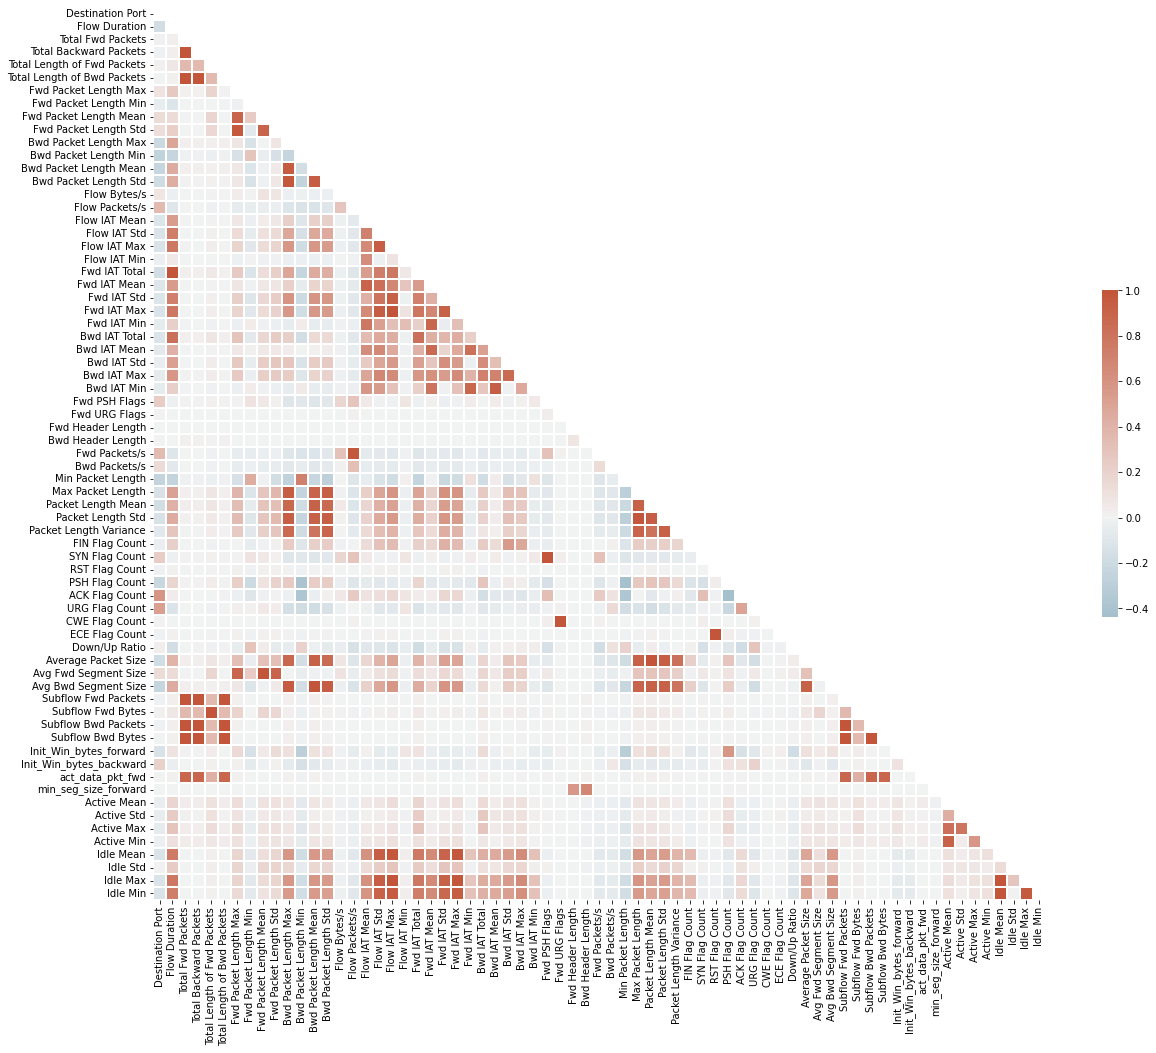

In [14]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, linewidths = 2, cbar_kws = {"shrink": 0.3})

## Choosing which features we will drop

In [15]:
def dependent_feature(dataset):
    cols = set()
    for i in range(0,len(dataset.columns)-1):
        for j in range(0,len(dataset.columns)-1):
            if i != j:
                corr = np.abs(dataset[dataset.columns[i]].corr(dataset[dataset.columns[j]]))
                if corr > 0.95:
                    cols.add(dataset.columns[j])
    return cols

In [16]:
correlated_col = dependent_feature(data)
data_copy = data.copy()

for i in range(0,len(data.columns)):
    if data.columns[i] not in correlated_col:
        data_copy.drop([data.columns[i]], axis = 1 , inplace = True) 

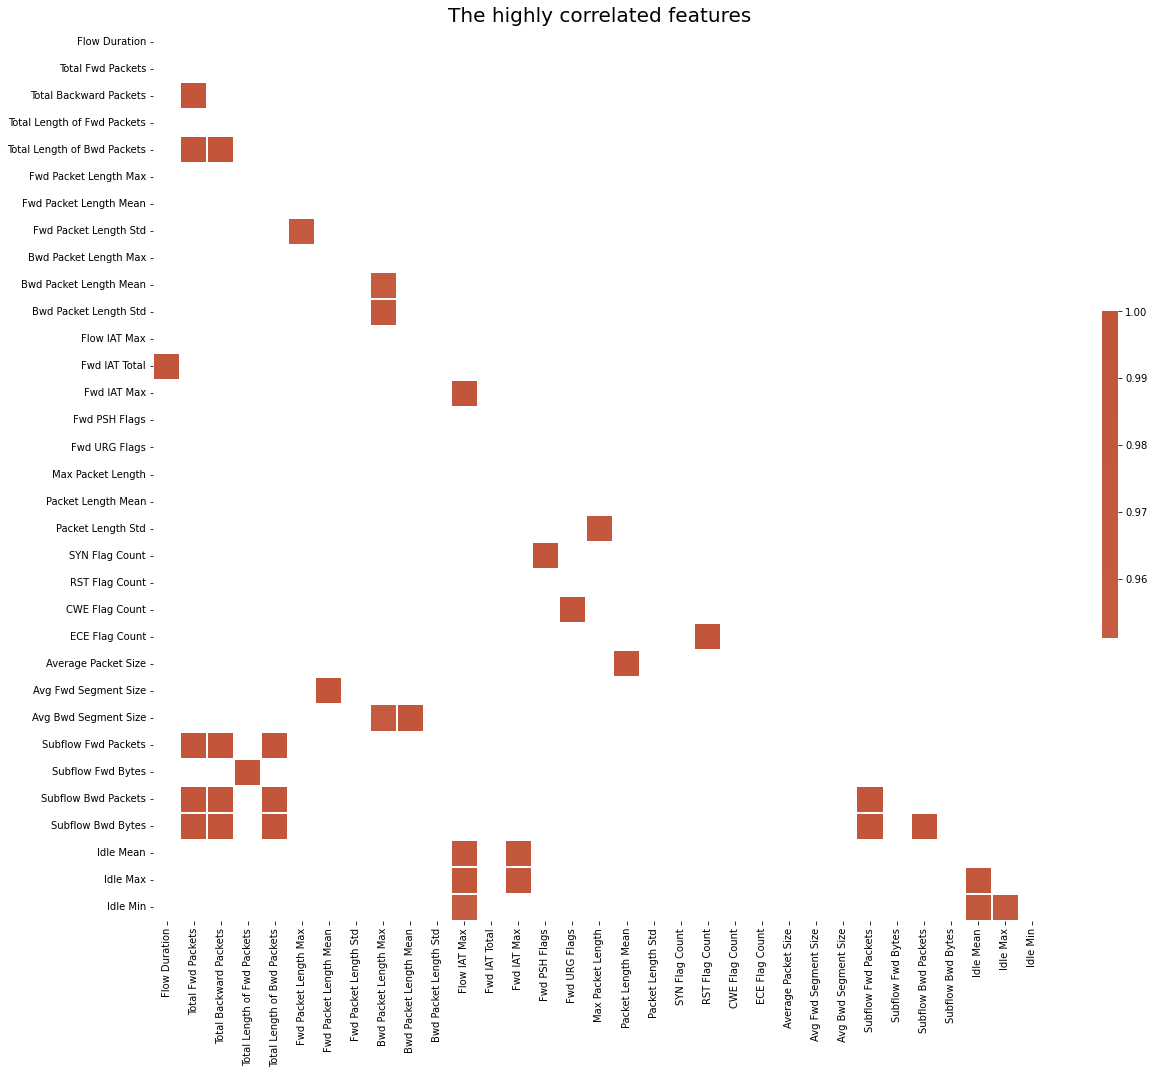

In [17]:
corr = np.abs(data_copy.corr())
corr = corr[corr>0.95]
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, linewidths = 2, cbar_kws = {"shrink": 0.3})
_ = plt.title('The highly correlated features', fontsize = 20)

***Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have a high correlation, we can drop one of the two features.***

**So, we will choose one of these highly correlated features as a feature for training the ML model, because, using all of them is a redundancy.**

In [18]:
# we keep 'Bwd IAT Max' and remove 'Bwd IAT Std' because they are highly correlated to each other
data.drop(['Bwd IAT Std'], axis = 1, inplace = True)

# we keep 'Fwd PSH Flags' and remove 'SYN Flag Count' because they are highly correlated to each other
data.drop(['SYN Flag Count'], axis = 1, inplace = True)

# we keep 'Avg Fwd Segment Size' and remove both 'Fwd Packet Length Max' and 'Fwd Packet Length Std' because they are highly correlated to each other
data.drop(['Fwd Packet Length Max', 'Fwd Packet Length Std'], axis = 1, inplace = True)

# we keep 'Subflow Bwd Bytes', and remove all of 'Subflow Bwd Packets', 'Subflow Fwd Packets', 'Total Backward Packets', 'Total Fwd Packets', 'Total Length of Bwd Packets', and 
# 'act_data_pkt_fwd' because they are highly correlated to each other
data.drop(['Subflow Bwd Packets', 'Subflow Fwd Packets', 'Total Backward Packets', 'Total Fwd Packets',
    'Total Length of Bwd Packets','act_data_pkt_fwd'], axis = 1, inplace = True)

# we keep 'ECE Flag Count' and remove 'RST Flag Count' because they are highly correlated to each other
data.drop(['RST Flag Count'], axis = 1, inplace = True)

# we keep 'CWE Flag Count'and remove 'Fwd URG Flags' because they are highly correlated to each other
data.drop(['Fwd URG Flags'], axis = 1, inplace = True)

# we remove Idle Max because it is highly correlated with Idle Mean
data.drop(['Idle Max'], axis = 1, inplace = True)

data.shape

(2522009, 57)

In [19]:
# remove infinity value
data = data[np.isfinite(data[data.columns[0:-1]]).all(1)]
data.shape

(2520798, 57)

Now, we have *56 feateres* and *1 target* and we have *2520798* instances